In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**EDA APPROACH**

In [16]:
# Install dependencies
!pip install shap matplotlib seaborn scikit-learn pandas openpyxl --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_excel('/content/drive/MyDrive/Study Project (Aimy)/Dataset/WQualityRiver-Data_updated.xlsx')

print("✅ Data Loaded Successfully!")
print("Shape:", df.shape)
df.head()


✅ Data Loaded Successfully!
Shape: (1605, 20)


,Monitoring Location,State,Temp_Min,Temp_Max,DO_Min,DO_Max,pH_Min,pH_Max,Conductivity_Min,Conductivity_Max,BOD_Min,BOD_Max,N_Min,N_Max,Fecal_Min,Fecal_Max,Coliform_Min,Coliform_Max,Strepto_Min,Strepto_Max
0,RIVER BEAS AT U/S MANALI,HIMACHAL PRADESH,2.0,24.0,7.8,9.2,7.2,8.2,68.0,380.0,1.0,2.8,0.32,1.15,2.0,170.0,63.0,540.0,2,2
1,RIVER BEAS AT D/S MANALI,HIMACHAL PRADESH,2.0,13.0,7.6,9.0,6.5,8.1,58.0,135.0,1.0,2.8,0.32,1.87,110.0,1600.0,920.0,1600.0,2,2
2,RIVER BEAS D/S OF WASTE PROCESSING FACILITY AT...,HIMACHAL PRADESH,2.0,13.0,7.8,8.8,6.7,7.8,62.0,113.0,1.0,2.8,0.32,1.08,110.0,1600.0,350.0,1600.0,2,2
3,RIVER BEAS D/S MANALSU NALLAH,HIMACHAL PRADESH,2.0,14.0,7.9,8.9,6.3,8.0,52.0,137.0,1.0,1.0,0.32,1.74,22.0,110.0,79.0,540.0,2,2
4,RIVER BEAS U/S BEFORE CONF. OF MANALSU NALLAH,HIMACHAL PRADESH,2.0,13.0,7.8,9.1,7.0,7.8,51.0,113.0,1.0,1.0,0.32,0.97,23.0,120.0,110.0,430.0,2,2


**Exploratory Data Analysis (EDA)**


🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1605 entries, 0 to 1604
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Monitoring Location  1605 non-null   object 
 1   State                1605 non-null   object 
 2   Temp_Min             1570 non-null   float64
 3   Temp_Max             1570 non-null   float64
 4   DO_Min               1604 non-null   float64
 5   DO_Max               1604 non-null   float64
 6   pH_Min               1605 non-null   float64
 7   pH_Max               1605 non-null   float64
 8   Conductivity_Min     1549 non-null   float64
 9   Conductivity_Max     1549 non-null   float64
 10  BOD_Min              1605 non-null   float64
 11  BOD_Max              1605 non-null   float64
 12  N_Min                1605 non-null   float64
 13  N_Max                1605 non-null   float64
 14  Fecal_Min            1412 non-null   float64
 15  Fecal_Max            

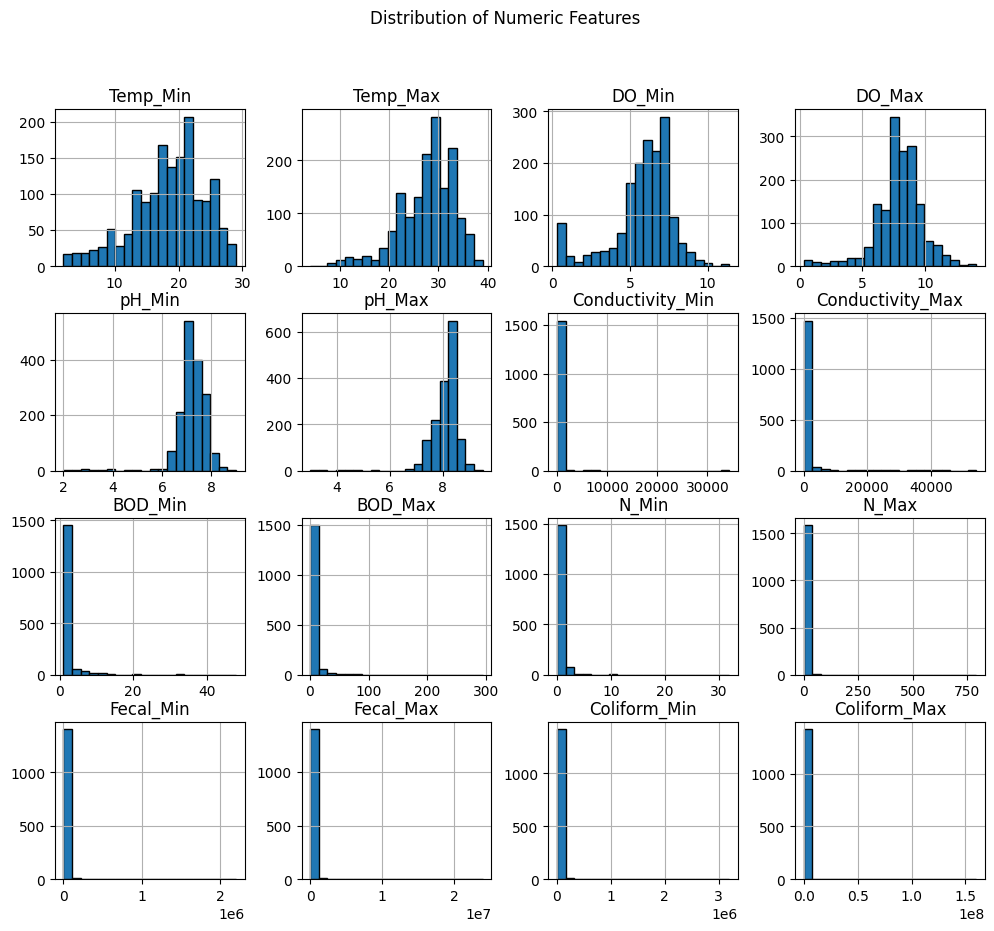

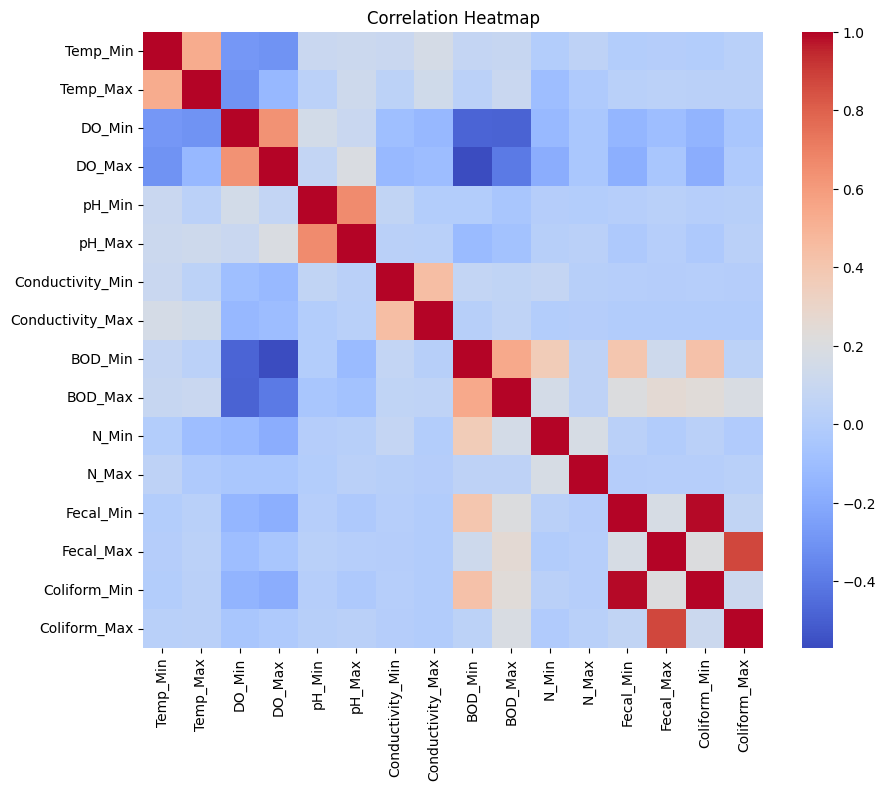

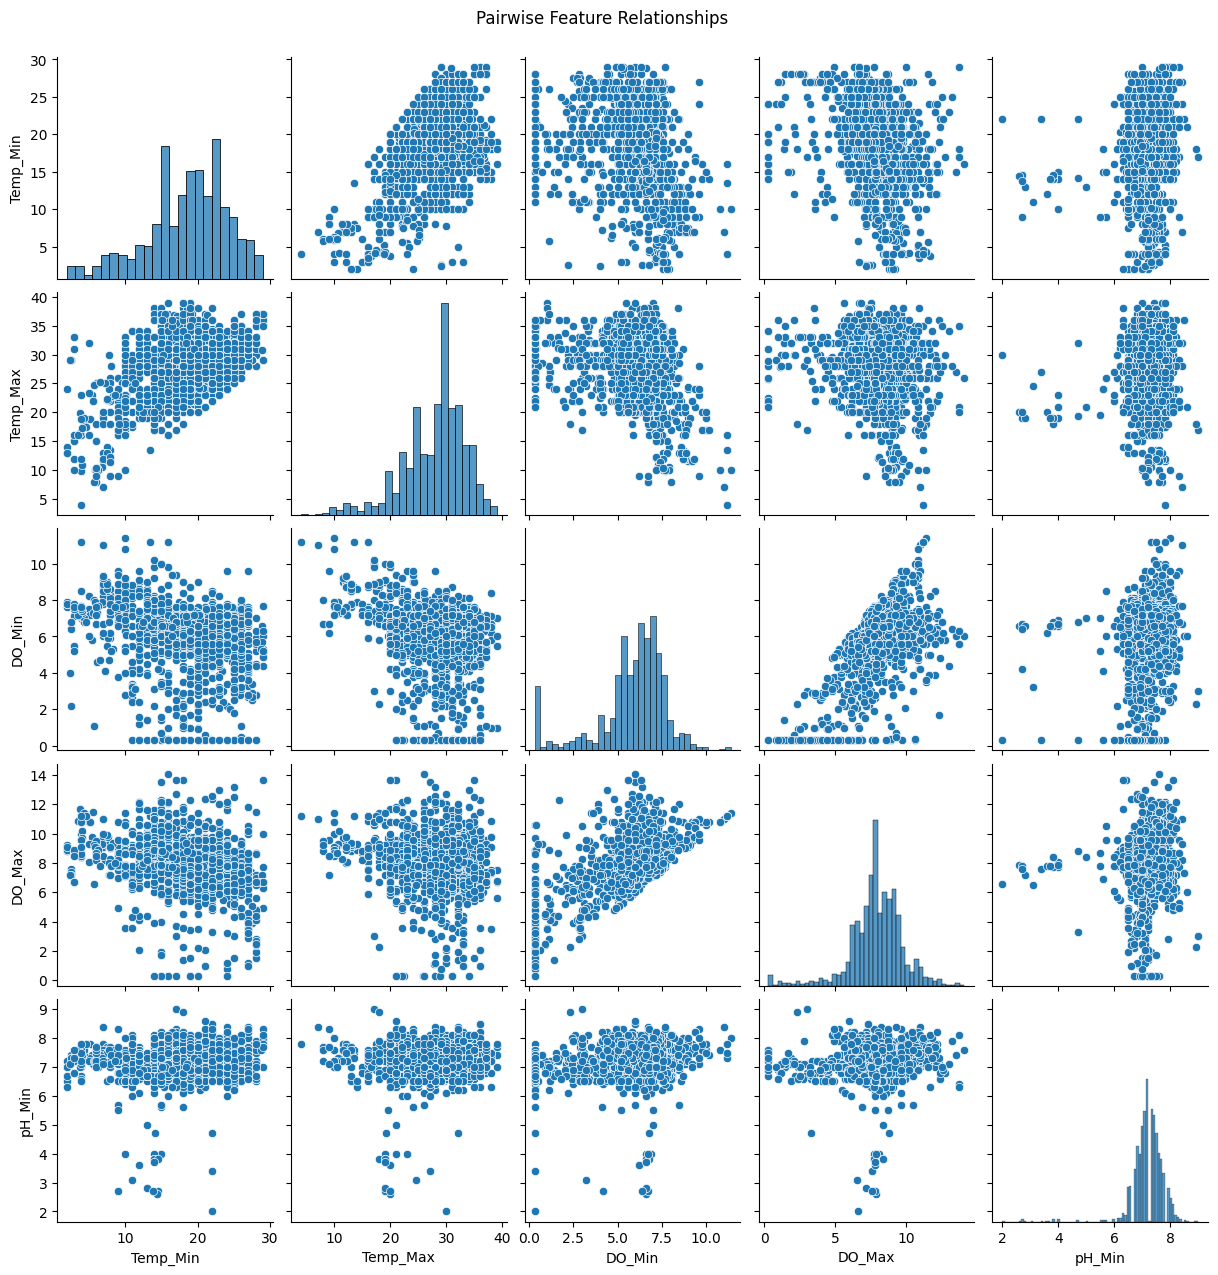

In [17]:
# Basic info
print("\n🔹 Dataset Info:")
print(df.info())

print("\n🔹 Missing Values:\n", df.isnull().sum())
print("\n🔹 Descriptive Statistics:\n", df.describe())

# Identify numeric and categorical columns
num_cols = df.select_dtypes(include='number').columns
cat_cols = df.select_dtypes(exclude='number').columns
print(f"\nNumeric columns: {list(num_cols)}")
print(f"Categorical columns: {list(cat_cols)}")

print('\n')

# Plot distributions of numeric features
df[num_cols].hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle("Distribution of Numeric Features")
plt.show()

print('\n')

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[num_cols].corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

print('\n')

# Pairplot (sample first 5 columns for clarity)
sns.pairplot(df[num_cols[:5]])
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.show()


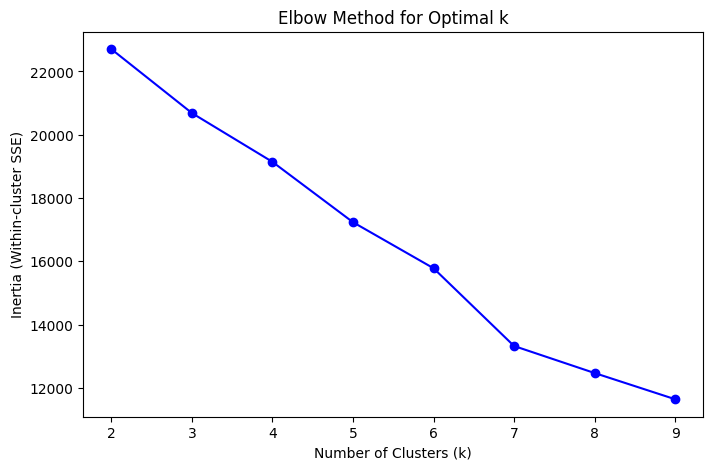

✅ Clustering complete. Silhouette Score = 0.570


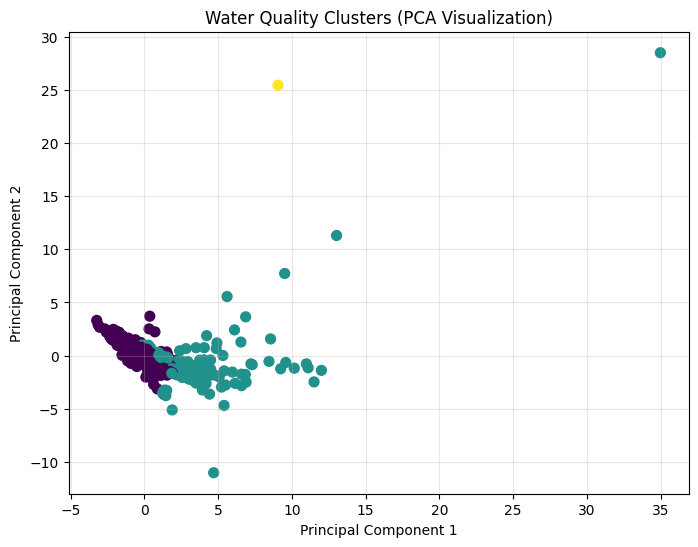

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Temp_Min,Temp_Max,DO_Min,DO_Max,pH_Min,pH_Max,Conductivity_Min,Conductivity_Max,BOD_Min,BOD_Max,N_Min,N_Max,Fecal_Min,Fecal_Max,Coliform_Min,Coliform_Max,Cluster
0,2.0,24.0,7.8,9.2,7.2,8.2,68.0,380.0,1.0,2.8,0.32,1.15,2.0,170.0,63.0,540.0,0
1,2.0,13.0,7.6,9.0,6.5,8.1,58.0,135.0,1.0,2.8,0.32,1.87,110.0,1600.0,920.0,1600.0,0
2,2.0,13.0,7.8,8.8,6.7,7.8,62.0,113.0,1.0,2.8,0.32,1.08,110.0,1600.0,350.0,1600.0,0
3,2.0,14.0,7.9,8.9,6.3,8.0,52.0,137.0,1.0,1.0,0.32,1.74,22.0,110.0,79.0,540.0,0
4,2.0,13.0,7.8,9.1,7.0,7.8,51.0,113.0,1.0,1.0,0.32,0.97,23.0,120.0,110.0,430.0,0


In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

# Keep only numeric columns
df_num = df[num_cols].copy()

# Handle missing values
df_num = df_num.fillna(df_num.mean(numeric_only=True))

# Scale data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_num)

# Find optimal number of clusters (Elbow Method)
inertia = []
k_values = range(2, 10)
for k in k_values:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(data_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, 'bo-')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-cluster SSE)")
plt.title("Elbow Method for Optimal k")
plt.show()

# Choose k=3 (you can adjust based on elbow curve)
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(data_scaled)

# Evaluate clustering
score = silhouette_score(data_scaled, labels)
print(f"✅ Clustering complete. Silhouette Score = {score:.3f}")

# Add labels to dataframe
df_clustered = df_num.copy()
df_clustered['Cluster'] = labels

# 2D PCA visualization
pca = PCA(n_components=2)
reduced = pca.fit_transform(data_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(reduced[:, 0], reduced[:, 1], c=labels, cmap="viridis", s=50)
plt.title("Water Quality Clusters (PCA Visualization)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True, alpha=0.3)
plt.show()

# Save clustered data
df_clustered.to_csv("Clustered_WaterQuality.csv", index=False)
from google.colab import files
files.download("Clustered_WaterQuality.csv")

df_clustered.head()

**Multi-Algorithm Clustering Comparison**

📊 Clustering Algorithm Comparison:

           Algorithm  Silhouette_Score
5  Agglomerative_k=2          0.929087
0         KMeans_k=2          0.580555
1         KMeans_k=3          0.569604
2         KMeans_k=4          0.559191
6  Agglomerative_k=3          0.481660
7  Agglomerative_k=4          0.475574
8  Agglomerative_k=5          0.470141
9  Agglomerative_k=6          0.452569
4         KMeans_k=6          0.282089
3         KMeans_k=5          0.269035



🏆 Best Performing Model: Agglomerative_k=2




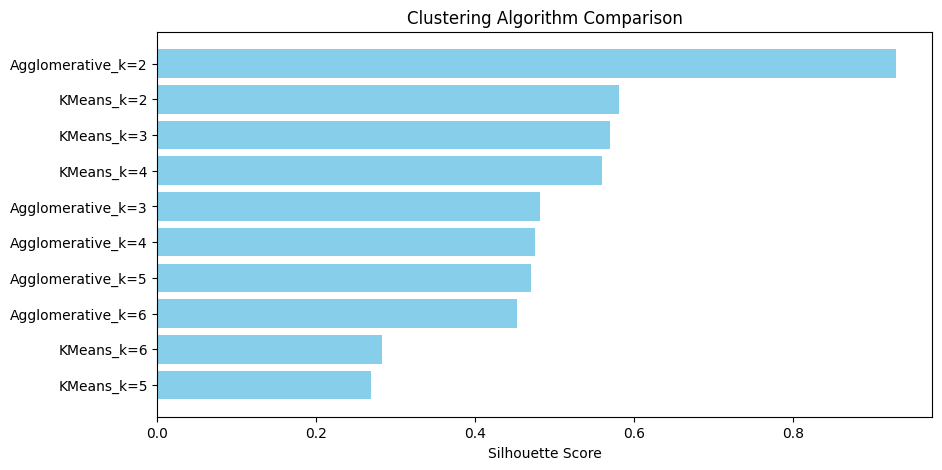

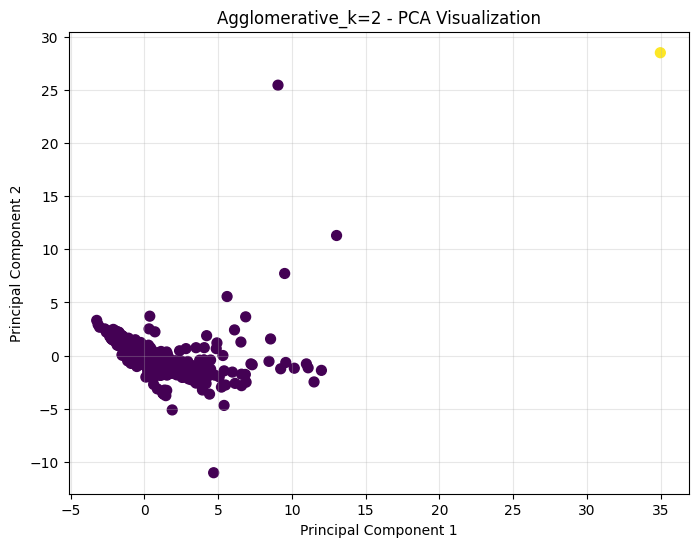

✅ Clustered dataset saved as BestClustered_WaterQuality.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [23]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Use numeric data only
X = df[num_cols].fillna(df[num_cols].mean(numeric_only=True))

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

results = {}

# --- 1️⃣ KMeans ---
for k in range(2, 7):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    results[f'KMeans_k={k}'] = score

# --- 2️⃣ DBSCAN ---
for eps in [0.3, 0.5, 0.7, 1.0]:
    db = DBSCAN(eps=eps, min_samples=5)
    labels = db.fit_predict(X_scaled)
    # ignore models that assign everything to one cluster
    if len(set(labels)) > 1 and -1 not in set(labels):
        score = silhouette_score(X_scaled, labels)
        results[f'DBSCAN_eps={eps}'] = score

# --- 3️⃣ Agglomerative ---
for k in range(2, 7):
    agg = AgglomerativeClustering(n_clusters=k)
    labels = agg.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    results[f'Agglomerative_k={k}'] = score


# ✅ Display results
results_df = pd.DataFrame(list(results.items()), columns=['Algorithm', 'Silhouette_Score'])
results_df = results_df.sort_values(by='Silhouette_Score', ascending=False)
print("📊 Clustering Algorithm Comparison:\n")
print(results_df)

print('\n')

# 🏆 Select best model
best_model = results_df.iloc[0, 0]
print(f"\n🏆 Best Performing Model: {best_model}")

print('\n')

# Visualize results
plt.figure(figsize=(10, 5))
plt.barh(results_df['Algorithm'], results_df['Silhouette_Score'], color='skyblue')
plt.xlabel("Silhouette Score")
plt.title("Clustering Algorithm Comparison")
plt.gca().invert_yaxis()
plt.show()

# --- 4️⃣ Refit the best model for visualization ---
algo, param = best_model.split('_')
if algo == "KMeans":
    n_clusters = int(param.split('=')[1])
    model = KMeans(n_clusters=n_clusters, random_state=42)
elif algo == "Agglomerative":
    n_clusters = int(param.split('=')[1])
    model = AgglomerativeClustering(n_clusters=n_clusters)
else:
    eps = float(param.split('=')[1])
    model = DBSCAN(eps=eps, min_samples=5)

labels = model.fit_predict(X_scaled)
df['Cluster'] = labels

# --- 5️⃣ PCA Visualization ---
pca = PCA(n_components=2)
reduced = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(reduced[:, 0], reduced[:, 1], c=labels, cmap='viridis', s=50)
plt.title(f"{best_model} - PCA Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True, alpha=0.3)
plt.show()

# Save clustered result for XAI
df_clustered = df.copy()
df_clustered.to_csv("BestClustered_WaterQuality.csv", index=False)
print("✅ Clustered dataset saved as BestClustered_WaterQuality.csv")

from google.colab import files
files.download("BestClustered_WaterQuality.csv")


**EXPLAINABLE AI (XAI) TECHNIQUES**

Saving BestClustered_WaterQuality.csv to BestClustered_WaterQuality (1).csv


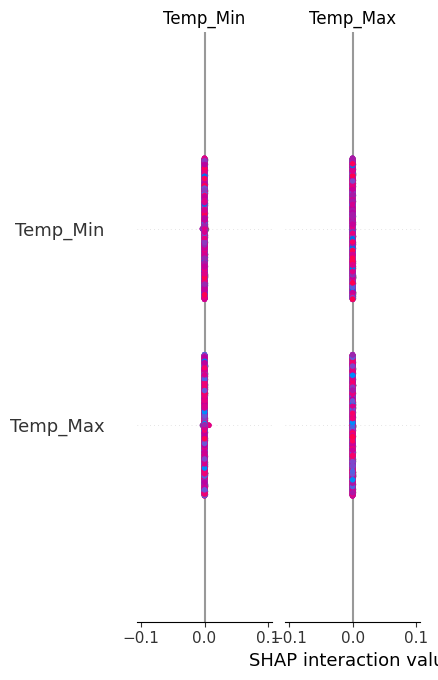

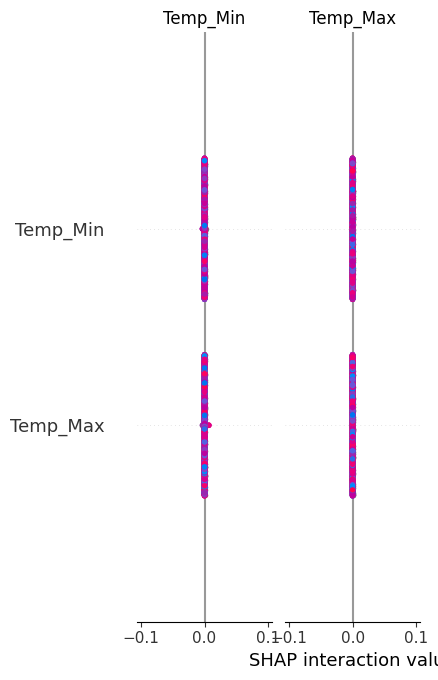

In [24]:
# STEP 9: XAI USING SAVED CLUSTERED FILE

import shap
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Upload or load the saved clustered CSV
from google.colab import files
uploaded = files.upload()  # choose "BestClustered_WaterQuality.csv" when prompted
clustered_df = pd.read_csv(next(iter(uploaded)))

# Separate features and cluster labels
X = clustered_df.select_dtypes(include=[np.number]).drop("Cluster", axis=1)
y = clustered_df["Cluster"]

# Train a simple surrogate model for SHAP explainability
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Compute SHAP values
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X)

# SHAP summary plot (bar)
shap.summary_plot(shap_values, X, feature_names=X.columns, plot_type="bar")

# SHAP feature impact plot
shap.summary_plot(shap_values, X, feature_names=X.columns)
